<h1>Here I show a application about Linear Algebra.  </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

<h3>Polynomial Interpolation</h3>
<p> Polynomial interpolation finds the unique polynomial of degree <b>n</b> which passes through <b>n+1</b> points in the <b>xy</b>-plane. For example, two points in the <b>xy</b>-plane determine a line and three points determine a parabola.

<img src="linearmath10.png">

<img src="linearmath11.png">

In [2]:
x = np.array([-1,0,1])
X = np.column_stack([[1,1,1],x,x**2])
print(X)

[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]


Create the vector <b>y</b> of <i>y</i> values:

In [3]:
y = np.array([1,0,1]).reshape(3,1)
print(y)

[[1]
 [0]
 [1]]


<img src="linearmath12.png">

In [5]:
a = la.solve(X,y)
print(a)

[[0.]
 [0.]
 [1.]]


<img src="linearmath13.png">

In [6]:
x = np.array([0,3,8])
X = np.column_stack([[1,1,1],x,x**2])
print(X)

[[ 1  0  0]
 [ 1  3  9]
 [ 1  8 64]]


And the vector of <i>y</i> values:

In [7]:
y = np.array([6,1,2]).reshape(3,1)
print(y)

[[6]
 [1]
 [2]]


Compute the vector <b><i>a</i></b> of coefficients:

In [8]:
a = la.solve(X,y)
print(a)

[[ 6.        ]
 [-2.36666667]
 [ 0.23333333]]


And plot the result:

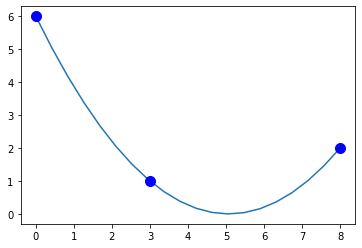

In [9]:
xs = np.linspace(0,8,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,x,y,'b.',ms=20)
plt.show()

<img src="linearmath14.png">

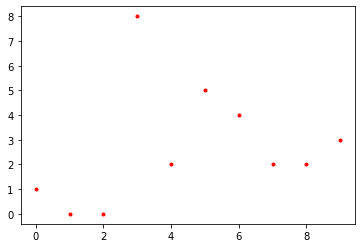

In [10]:
N = 10
x = np.arange(0,N)
y = np.random.randint(0,10,N)
plt.plot(x,y,'r.')
plt.show()

Create the Vandermonde matrix and verify the first 5 rows and columns:

In [11]:
X = np.column_stack([x**k for k in range(0,N)])
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


We could also use the NumPy function numpy.vander. We specify the option increasing=True so that powers of <b><i>x<sub>i</sub></i></b> increase left-to-right:

In [12]:
X = np.vander(x,increasing=True)
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


Solve the linear system:

In [13]:
a = la.solve(X,y)

Plot the interpolation:

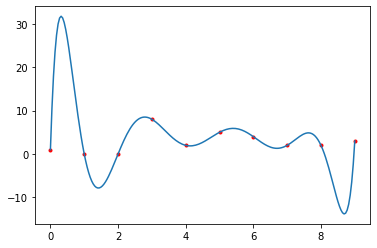

In [14]:
xs = np.linspace(0,N-1,200)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x,y,'r.',xs,ys)
plt.show()

Success! But notice how unstable the curve is. That's why it better to use a cubic spline to interpolate a large number of points.

However real-life data is usually very noisy and interpolation is not the best tool to fit a line to data. Instead we would want to take a polynomial with smaller degree (like a line) and fit it as best we can without interpolating the points.

<img src="linearmath15.png">

<img src="linearmath16.png">

<img src="linearmath17.png">

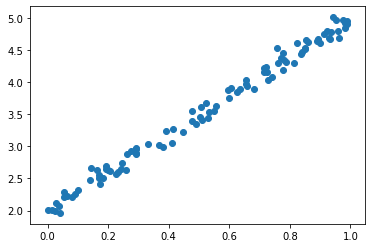

In [16]:
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.randn(100)
y = a0 + a1*x + noise
plt.scatter(x,y);
plt.show()

Let's use linear regression to retrieve the coefficients <b><i>a<sub>0</sub></i></b>  and <b><i>a<sub>1</sub></i></b>. Construct the matrix <b><i>X</i></b>:

In [17]:
X = np.column_stack([np.ones(N),x])
print(X.shape)

(100, 2)


Let's look at the first 5 rows of <b><i>X</i></b> to see that it is in the correct form:

In [18]:
X[:5,:]

array([[1.        , 0.27434797],
       [1.        , 0.01499234],
       [1.        , 0.14364438],
       [1.        , 0.7706126 ],
       [1.        , 0.22683615]])

Use scipy.linalg.solve to solve <b><i>(X<sup>T</sup> X) a = (X<sup>T</sup>) y </i></b> for <b><i>a</i></b>:

In [19]:
a = la.solve(X.T @ X, X.T @ y)
print(a)

[2.00458248 2.97243066]


We have retrieved the coefficients of the model almost exactly! Let's plot the random data points with the linear regression we just computed.

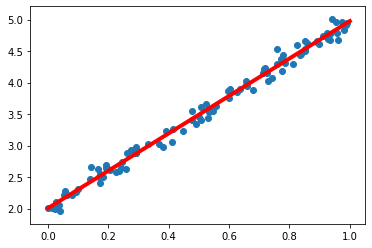

In [20]:
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.show()

Real Kobe Bryant Data

Let's work with some real data. Kobe Bryant retired in 2016 with 33643 total points which is the third highest total points in NBA history. How many more years would Kobe Bryant have to had played to pass Kareem Abdul-Jabbar's record 38387 points?

Kobe Bryant's peak was the 2005-2006 NBA season. Let's look at Kobe Bryant's total games played and points per game from 2006 to 2016.

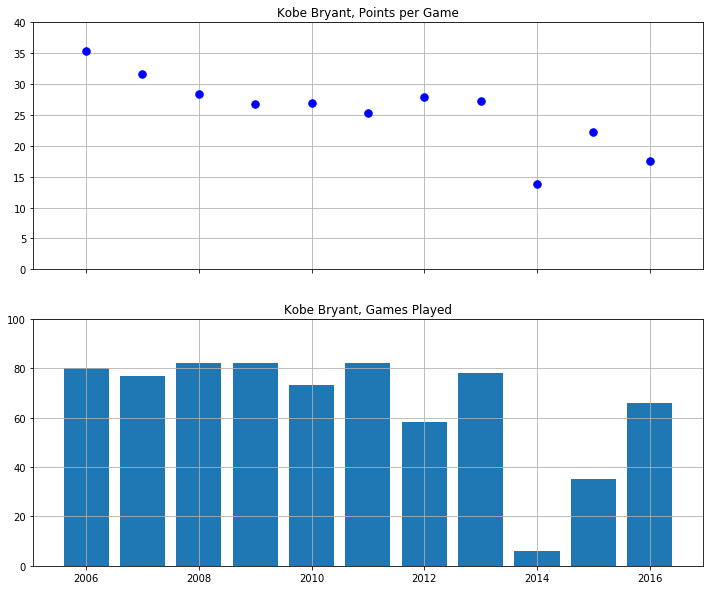

In [21]:
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
games = [80,77,82,82,73,82,58,78,6,35,66]
points = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,13.8,22.3,17.6])

fig = plt.figure(figsize=(12,10))
axs = fig.subplots(2,1,sharex=True)
axs[0].plot(years,points,'b.',ms=15)
axs[0].set_title('Kobe Bryant, Points per Game')
axs[0].set_ylim([0,40])
axs[0].grid(True)
axs[1].bar(years,games)
axs[1].set_title('Kobe Bryant, Games Played')
axs[1].set_ylim([0,100])
axs[1].grid(True)
plt.show()

Kobe was injured for most of the 2013-2014 NBA season and played only 6 games. This is an outlier and so we can drop this data point:

In [22]:
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016])
games = np.array([80,77,82,82,73,82,58,78,35,66])
points = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,22.3,17.6])

Let's compute the average games played per season over this period:

In [23]:
avg_games_per_year = np.mean(games)
print(avg_games_per_year)

71.3


Compute the linear model for points per game:

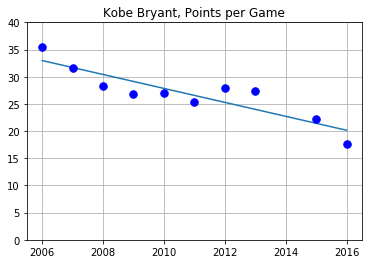

In [24]:
X = np.column_stack([np.ones(len(years)),years])
a = la.solve(X.T @ X, X.T @ points)
model = a[0] + a[1]*years

plt.plot(years,model,years,points,'b.',ms=15)
plt.title('Kobe Bryant, Points per Game')
plt.ylim([0,40])
plt.grid(True)
plt.show()

Now we can extrapolate to future years and multiply points per games by games per season and compute the cumulative sum to see Kobe's total points:

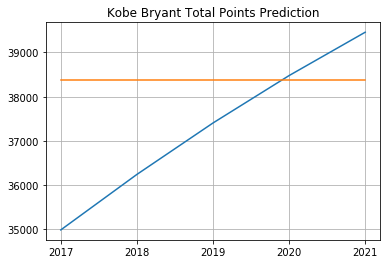

In [25]:
future_years = np.array([2017,2018,2019,2020,2021])
future_points = (a[0] + a[1]*future_years)*avg_games_per_year
total_points = 33643 + np.cumsum(future_points)
kareem = 38387*np.ones(len(future_years))

plt.plot(future_years,total_points,future_years,kareem)
plt.grid(True)
plt.xticks(future_years)
plt.title('Kobe Bryant Total Points Prediction')
plt.show()

Only 4 more years!

<img src="linearmath18.png">

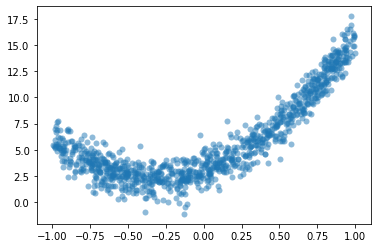

In [26]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

Construct the matrix <b>X</b>:

In [27]:
X = np.column_stack([np.ones(N),x,x**2])

Use scipy.linalg.solve to solve <b><i>(X<sup>T</sup> X) a = (X<sup>T</sup>) y </i></b>:

In [28]:
a = la.solve((X.T @ X),X.T @ y)

Plot the result:

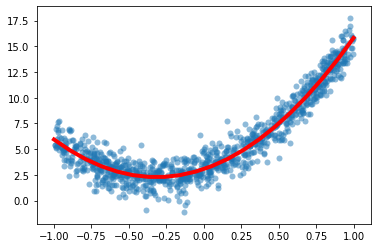

In [29]:
xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

Graph Theory
A graph is a set of vertices and a set of edges connecting some of the vertices. We will consider simple, undirected, connected graphs:

* a graph is simple if there are no loops or multiple edges between vertices
* a graph is undirected if the edges do not have an orientation
* a graph is connected if each vertex is connected to every other vertex in the graph by a path
We can visualize a graph as a set of vertices and edges and answer questions about the graph just by looking at it. However this becomes much more difficult with a large graphs such as a social network graph. Instead, we construct matrices from the graph such as the adjacency matrix and the Laplacian matrix and study their properties.

Spectral graph theory is the study of the eigenvalues of the adjacency matrix (and other associated matrices) and the relationships to the structure of <b>G</b>.



<h3>NetworkX</h3><br>
Let's use the Python package NetworkX to construct and visualize some simple graphs.

In [30]:
import networkx as nx

<img src="linearmath19.png">

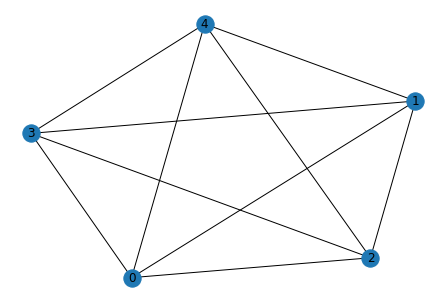

In [31]:
G = nx.complete_graph(5)
nx.draw(G,with_labels=True)

In [32]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


<img src="linearmath20.png">

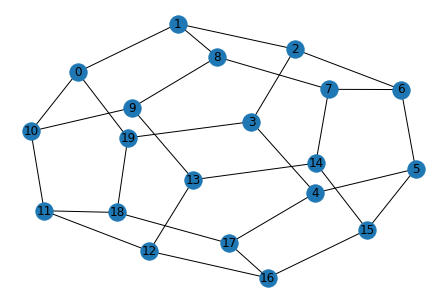

In [34]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [35]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


With this labelling, let's find the length of the shortest path from vertex 0 to 15:

In [36]:
i = 0
j = 15
k = 1
Ak = A
while Ak[i,j] == 0:
    Ak = Ak @ A
    k = k + 1
print('Length of the shortest path is',k)

Length of the shortest path is 5


<img src="linearmath21.png">

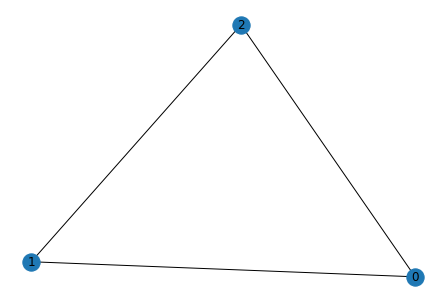

In [37]:
C3 = nx.complete_graph(3)
nx.draw(C3,with_labels=True)

In [38]:
A3 = nx.adjacency_matrix(C3).todense()
eigvals, eigvecs = la.eig(A3)
int(np.round(np.sum(eigvals.real**3)/6,0))

1

Let's compute the number of triangles in the complete graph 7 vertices:

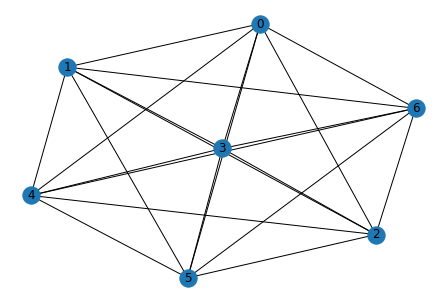

In [39]:
C7 = nx.complete_graph(7)
nx.draw(C7,with_labels=True)

In [40]:
A7 = nx.adjacency_matrix(C7).todense()
eigvals, eigvecs = la.eig(A7)
int(np.round(np.sum(eigvals.real**3)/6,0))

35

<img src="linearmath22.png">

In [41]:
def triangles(M):
    A = (M + M.T)/2
    eigvals, eigvecs = la.eig(A)
    eigvals = eigvals.real
    return int(np.round(np.sum(eigvals**3)/6,0))

Next, let's try a Turan graph.

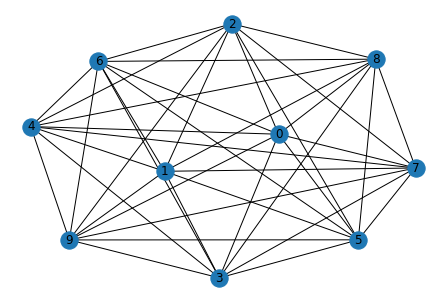

In [42]:
G = nx.turan_graph(10,5)
nx.draw(G,with_labels=True)

In [43]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]


Find the number of triangles:

In [44]:
triangles(A)

80

Finally, let's compute the number of triangles in the dodecahedral graph:

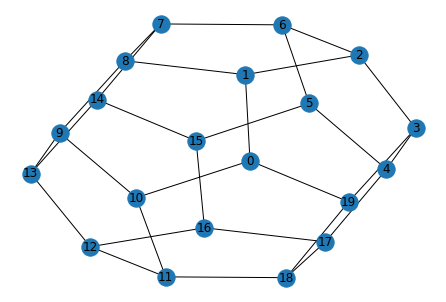

In [45]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [46]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [47]:
np.round(triangles(A),2)

0

Inpired By: https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/applications/